## Import packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from joblib import load, dump

## Load data

In [ ]:
file = "verifieddataframe.sav"
dir = "/Users/eric/PycharmProjects/PMF2022/Daten_mit_Gewicht"
path = os.path.join(dir, file)
df = load(path)

In [9]:
df.info(verbose=True, null_counts=True)
# df.head(10)

/var/folders/0k/91s6bnkn0q96mh34g_mbkzb00000gn/T/ipykernel_20958/2877459279.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365401 entries, 0 to 365400
Data columns (total 143 columns):
 #    Column                                            Non-Null Count   Dtype         
---   ------                                            --------------   -----         
 0    Station ID                                        365401 non-null  int64         
 1    User                                              49548 non-null   object        
 2    Customer Number                                   365401 non-null  object        
 3    Delivery ID                                       365401 non-null  int64         
 4    Customer Delv No.                                 365401 non-null  object        
 5    ID                                                365401 non-null  int64         
 6    Created                                           365401 non-null  datetime64[ns]
 7    Entered PartNo                                    254258 non-null  object        
 8    En

,Station ID,User,Customer Number,Delivery ID,Customer Delv No.,ID,Created,Entered PartNo,Entered Reman,Real PartNo,...,verifiedRealPartNoIAMgesamt,verifiedRealPartNo,NoRemanInverifiedRealPartNoIAMgesamt,NoRemanInverifiedRealPartNo,NoRemanInRealPartNoIAMgesamt,NoRemanInRealPartNo,verifiedRealPartNoOfNoRemanInRealPartNoIAMgesamt,verifiedRealPartNoOfNoRemanInRealPartNo,verifiedRemanIAMgesamt,verifiedReman
0,602,Nicolas Hahn,43010507,6020004476,BXFR22959,2009286020001,2020-09-28 08:06:01,NaN,0986134428,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,602,Fabian Seeger,43003659,6020004477,BXFR22978,2009286020002,2020-09-28 08:06:06,0 001 109 030,0986017790,0 001 109 030,...,0001109030,0001109030,0001109030,0001109030,0001109030,0001109030,0001109030,0001109030,0986017790,0986017790
2,602,Fabian Seeger,43003659,6020004477,BXFR22978,2009286020003,2020-09-28 08:06:18,TS12E9,0986022800,TS12E9,...,TS12E9,TS12E9,TS12E9,TS12E9,TS12E9,TS12E9,TS12E9,TS12E9,NaN,NaN
3,602,Fabian Seeger,43003659,6020004477,BXFR22978,2009286020004,2020-09-28 08:06:38,M 001 T 80681,0986023530,M 001 T 80681,...,M001T80681,M001T80681,M001T80681,M001T80681,M001T80681,M001T80681,M001T80681,M001T80681,NaN,NaN
4,602,Fabian Seeger,43003659,6020004477,BXFR22978,2009286020005,2020-09-28 08:06:53,TS18ER121,0986024100,TS18ER121,...,TS18ER121,TS18ER121,TS18ER121,TS18ER121,TS18ER121,TS18ER121,TS18ER121,TS18ER121,NaN,NaN
5,602,Fabian Seeger,43003659,6020004477,BXFR22978,2009286020006,2020-09-28 08:07:06,D 6 RA 572,0986013850,D 6 RA 572,...,D6RA572,D6RA572,D6RA572,D6RA572,D6RA572,D6RA572,D6RA572,D6RA572,0986013850,0986013850
6,602,Nicolas Hahn,43010507,6020004476,BXFR22959,2009286020007,2020-09-28 08:07:33,NaN,0986135074,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,602,Nicolas Hahn,43010507,6020004476,BXFR22959,2009286020008,2020-09-28 08:08:06,NaN,0986135428,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,602,Fabian Seeger,43003659,6020004477,BXFR22978,2009286020009,2020-09-28 08:08:23,D7R53,0986020141,D7R53,...,D7R53,D7R53,D7R53,D7R53,D7R53,D7R53,D7R53,D7R53,0986020141,0986020141
9,602,Nicolas Hahn,43010507,6020004476,BXFR22959,2009286020010,2020-09-28 08:08:34,NaN,0986473164,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0986473164,0986473164


In [19]:
interested_cols = ['verifiedRealPartNo',
        'verifiedReman',
        'Customer Number',
        'Weight',
        'ESTIMATED_WEIGHT',
        'Bar Code',
        'Box code',
        'Product Group',
        'Program']
df_interested = df[interested_cols]
df_interested.rename(columns = {'verifiedRealPartNo':'OEN', 'verifiedReman':'RemanNo', 'ESTIMATED_WEIGHT' : 'Estimated Weight', 'Box code': 'Box Code'}, inplace = True)
df_interested

/var/folders/0k/91s6bnkn0q96mh34g_mbkzb00000gn/T/ipykernel_20958/2589289798.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interested.rename(columns = {'verifiedRealPartNo':'OEN', 'verifiedReman':'RemanNo', 'ESTIMATED_WEIGHT' : 'Estimated Weight', 'Box code': 'Box Code'}, inplace = True)


,OEN,RemanNo,Customer Number,Weight,Estimated Weight,Bar Code,Box Code,Product Group,Program
0,NaN,NaN,43010507,5.734,NaN,4047025604376.0,4047025604376.0,Brake Caliper,IAM gesamt
1,0001109030,0986017790,43003659,4.002,4.01,3165141219999.0,3165141219999.0,Starter,IAM gesamt
2,TS12E9,NaN,43003659,2.740,2.74,4047024614383.0,4047024614383.0,Starter,IAM gesamt
3,M001T80681,NaN,43003659,3.698,3.67,4047024813311.0,4047024813311.0,Starter,IAM gesamt
4,TS18ER121,NaN,43003659,3.386,3.38,4047024852686.0,4047024852686.0,Starter,IAM gesamt
...,...,...,...,...,...,...,...,...,...
365396,NaN,0986441556,43963041,0.798,NaN,4047024819030.0,4047024819030.0,Unit Injector,IAM gesamt
365397,0445010045,NaN,43963041,4.544,4.71,4047023258236.0,4047023258236.0,Common Rail High Pressure Pump,IAM gesamt
365398,0445010514,0986437420,43963041,2.856,2.88,4047025117005.0,4047025117005.0,Common Rail High Pressure Pump,IAM gesamt
365399,0445010075,NaN,43963041,4.990,4.98,3165143321072.0,3165143321072.0,Common Rail High Pressure Pump,IAM gesamt


## Merkmal Beschreibung

In [77]:
df_interested1 = df_interested[['OEN','RemanNo','Customer Number', 'Weight', 'Bar Code', 'Product Group', 'Program']]
merkmal_beschreibung = pd.DataFrame()
merkmal_beschreibung['Merkmal'] = df_interested1.columns
# merkmal_beschreibung.insert(loc= 1 , column ='Beispiel', value = df_interested1.loc[1].tolist())
merkmal_beschreibung['Beispiel'] = df_interested1.loc[1].to_list()
merkmal_beschreibung['Non NAN'] = [df_interested[col].count() for col in df_interested1.columns]
merkmal_beschreibung['Anteil Non-NaN'] = [ "{:.1%}".format(row/df_interested1.shape[0])for row in merkmal_beschreibung['Non NAN']]
merkmal_beschreibung['Skalenniveau'] = 'Nominalskala'; merkmal_beschreibung.loc[3,'Skalenniveau'] = 'Ratioskala'
merkmal_beschreibung['Datentyp'] = df_interested1.dtypes.to_list()
merkmal_beschreibung

,Merkmal,Beispiel,Non NAN,Anteil Non-NaN,Skalenniveau,Datentyp
0,OEN,0001109030,231916,63.5%,Nominalskala,object
1,RemanNo,0986017790,175250,48.0%,Nominalskala,object
2,Customer Number,43003659,365401,100.0%,Nominalskala,object
3,Weight,4.002,301723,82.6%,Ratioskala,float64
4,Bar Code,3165141219999.0,316987,86.8%,Nominalskala,object
5,Product Group,Starter,365401,100.0%,Nominalskala,object
6,Program,IAM gesamt,326526,89.4%,Nominalskala,object


## Which OEN appears the most frequently?

In [94]:
# count real partNo
data = df_interested["OEN"].value_counts()
data.median()

3.0

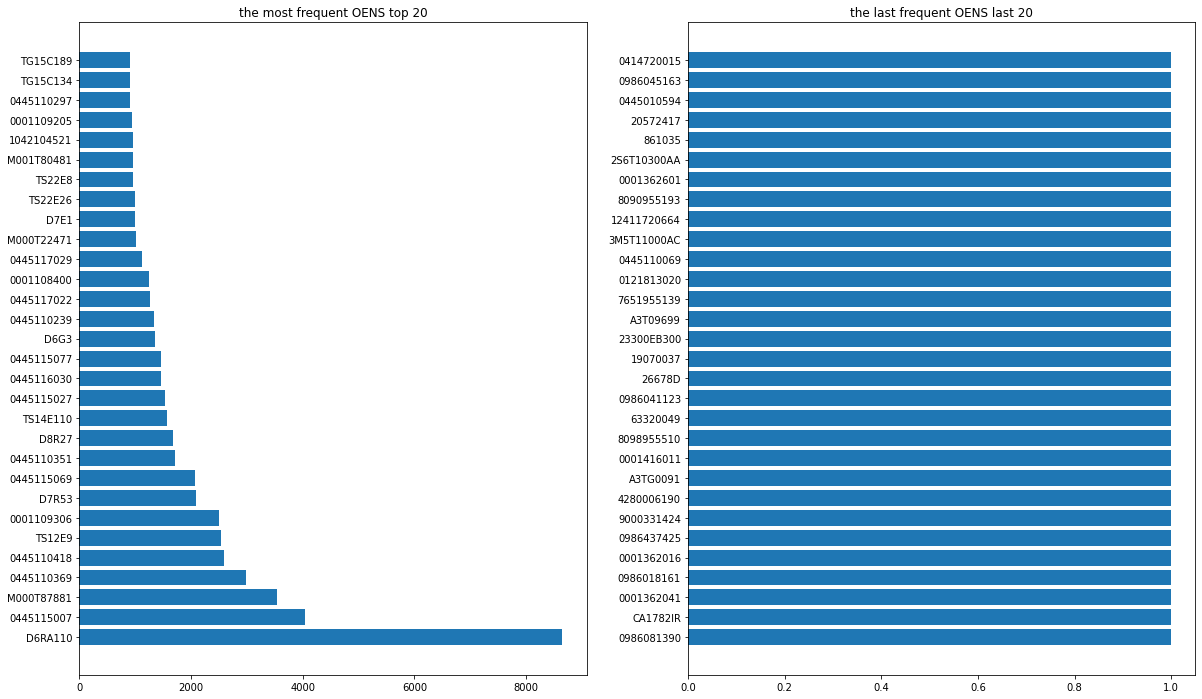

In [93]:
plt.figure(figsize=(20,12))
plt.subplot(121)
plt.barh(data.head(30).index ,data.head(30))
plt.xticks(rotation=0)
plt.title('the most frequent OENS top 20')
plt.subplot(122)
plt.barh(data.tail(30).index ,data.tail(30))
plt.xticks(rotation=0)
plt.title('the last frequent OENS last 20')
plt.show()